# Notebook for MDC_52P88_EP 2025 --- RNA subproject

## First class - Python warm up and the Vienna RNA package

In the class INF588, you are going to work on two different Bioinformatics projects:   
- Computing alignments of proteins using structural information  
- Predicting the structure of RNAs from an RNA alignment

Both projects require you to write Python code to implement the required algorithms and tools and then apply them to biological data.

Thus, before jumping into these projects it makes sense to

1. re-activate or strengthen your Python skills by solving some warm-up assignments, which mostly prepare code required in the projects;
1. learn about simple use of Biopython to read/write bio-data. *Note*: find details online on-the-go, e.g. when you want to read sequences from fasta format and alignments in clustal or stockholm format;
1. learn how to use the Vienna RNA package, which we need for the RNA-related project.



## About this document

This Jupyter notebook serves several purposes:

* It contains warm-up Python programming tasks for the first class.

* It introduces the Vienna RNA package for use in the RNA folding project.

* It shows how to install required software including Python, Biopython and the Vienna RNA package, locally or in Google Colab.

* It provides examples for the use of the Vienna package from Python - providing a mini-tutorial tailored to our needs.

* Finally, it provides a pointer to test data (and shows how to upload it on Colab, if you have to).

For today, it is possible to work in this notebook on Colab, i.e. write and run your code in the browser. You could continue using Colab for the rest of this class, but it is likely more convenient to continue without Colab after install Python and the required packages locally.


## Installation of Biopython and the Vienna RNA package

We install the special Python modules Biopython and the Vienna RNA package using pip. On Google Colab, this requires no further preparation, but the
installation has to be repeated once per session. If you work locally (as recommended), then the installation needs to be done only once. However, you need to install Python 3.x, pip, and VS Code or Jupyter(*) in advance. 

(*) We recommend VS Code to edit and run this Jupyter notebook (.ipynb file); or use Jupyter to do the same in your browser. 

Our two special Python modules can be installed by pip by running the next cell. In the same way, we can install additional packages as required, e.g. matplotlib and seaborn. Many standard packages are typically alread installed in Google Colab.

In [1]:
!pip install viennarna biopython

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Python warm-up assignments



### Assignment 1: Sequence identity of an alignment

An RNA sequence is a string containing only the characters A, C, G, and U, which denote the four nucleotides Adenin, Cytosin, Guanin, and Uracil.

An alignment of two RNA sequences x and y is typically represented by a pair of alignment strings x' and y' that additionally contain gap symbols $-$.

The pair $x', y'$ represents an alignment of RNA sequences $x$ and $y$ iff
1. removing gap symbols in $x'$ [$y'$] yields the sequences $x$ [$y$], resp.
2. there is no $i$ such that $x_i=-$ and $y_i=-$.

For example,
```
x' = ACGU--CGACUAGC-
y' = -CGUCGU-ACUCGCG
```
represents an alignment of ```ACGUCGACUAGC``` and ```CGUCGUACUCGCG```.
A column $(x'_i,y'_i)$ is called a match if $x'_i=y'_i$.

1. Write a function that takes the two alignment strings and returns the percentage of match colunmns, i.e. the sequence identity of the alignment.

1. In publicly available RNA sequence data, one will often find small letter symbols and even T instead of U. Extend the function such that it can converts small letters to capital ones and T to U. Write another function to perform this transformation and make the transformation optional in the sequence identity function, e.g. by adding another argument with default ```True```.

1. Write a function that returns a list of the *edges* in an alignment. An edge is a pair of respective positions $i$ and $j$ in $x$ and $y$ that are in the same alignment column (regardless whether matched or mismatched). The alignment should be givn as a pair of alignment strings. Indexing sequence positions from 1 to the sequence length [*1-based indexing*], edges of our example alignment are (2,1), (3,2), (4,3), (5,6), ..., (12,12). For example, (5,6) is an *edge* of the alignment given by $x',y'$, because the `C` at position 5 of sequence $x$ is in the same column as the `U` at position 6 of $y$.

1. Add meaningful doc strings to your functions. Generally, one should get into the habit of writing at least a brief description for every function / method / class. It is good practice, to describe arguments and return value (see function sequence_identity below). Using type hints, as in sequence_identity (even sporadically), can be a good idea as well.

1. Write unit tests for your functions; design simple examples that include edge cases like gaps at the beginning and end of sequences, consecutive insertion and deletion, empty alignment, identical alignment strings, no identity...

In [3]:
def sequence_identity(xp:str, yp:str) -> str:
    """
    Sequence identity of two aligned sequences

    Args:
      xp: alignment string of sequence x
      yp: alignment string of sequence y
    
    Returns:
      Percentage of identical alignment columns
    """
    l = len(xp)
    percentage = 0
    for i in range(l):
        if xp[i] == yp[i]:
            percentage += 1
    percentage = percentage / l * 100
    return f"{percentage:.2f}%"

### Assignment 2: RNA structure dot-bracket representation


An *RNA structure* for an RNA of sequence length $n$ is a set of *base pairs* $(i,j)$, $1 \leq i < j \leq n$. Typically, we restrict ourselves to structures that can be represented by *dot-bracket strings*. These strings contain only dots ```.``` and opening and closing brackets ```(``` and ```)```. They contain one symbol for each sequence position. The dot marks an unpaired position, while an opening bracket tells that the base is paired to the base of the corresponding closing bracket.

For example, let the sequence and structure of an RNA described by
```
sequence = "CGCUUAGCGAAUC"
dbstring = ".((...))(...)"
```
Then, the dot-bracket string ```dbstring``` describes the structure (aka the set of base pairs) ```{(2,8),(3,7),(9,13)}```.

A structure is *canonical* for a sequence $x$, if for all base pairs $(i,j)$ of the structure $(x_i,x_j)$ is one of the *canonical base pairs* (A,U),(C,G),(G,C),(G,U),(U,A), or (U,G).

1. Write a function that takes a sequence length and a set or list of base pairs and returns the corresponding dot-bracket string.

1. Write a function ```parse_RNA_structure``` that takes a dot-bracket string and returns the corresponding base pair set as a list. How should it handle invalid dot-bracket strings? Use exceptions (https://docs.python.org/3/tutorial/errors.html).

1. Write a function ```is_canonical``` that checks whether a structure, given as dot-bracket string, is canonical for a sequence. (Write helper functions like ```is_canonical_basepair(x,y)```, where reasonable.)

1. Based on your previous code, implement a Python class ```RnaMolecule``` that represents an RNA sequence and a corresponding structure. Objects of this class should be initialized with a sequence and optionally a structure, printing an object should show the sequence and dot bracket string, it should be possible to get the base pair list representation of an object... (https://docs.python.org/3/tutorial/classes.html)

**Note:** pay attention that we use one-based positions to describe the base pairs, while strings in Python use zero-based indices. One and zero-based indexing is a recurring issue when working with RNAs and specifically the Vienna RNA package. Beware since this is a potential source of errors.

#### 1. Pairs to bracket

In [4]:
def pairs_to_dot_bracket(n, base_pairs):
    structure = ["."] * n

    for i, j in base_pairs:
        structure[i-1] = "("
        structure[j-1] = ")"
        
    return "".join(structure)

In [5]:
n = 13
pairs = [(2,8), (3,7), (9,13)]
print(pairs_to_dot_bracket(n, pairs))

.((...))(...)


#### 2. brackets to pair

In [6]:
def parse_RNA_structure(dbstring):
    base_pairs = []
    stack = []
    
    for index, char in enumerate(dbstring):
        position = index + 1  
        
        if char == '(':
            stack.append(position)
        elif char == ')':
            if not stack:
                raise ValueError(f"Erreur à la position {position} : parenthèse fermante sans correspondante.")
            opening_pos = stack.pop()
            base_pairs.append((opening_pos, position))
        elif char == '.':
            continue
        else:
            raise ValueError(f"Caractère invalide '{char}' détecté à la position {position}.")
            
    if stack:
        raise ValueError(f"Erreur : {len(stack)} parenthèse(s) ouvrante(s) non fermée(s) (positions : {stack}).")
        
    return sorted(base_pairs)

In [7]:
try:
    print(parse_RNA_structure(".((...))(...).")) # Succès
    # print(parse_RNA_structure("((.)) )"))      # Erreur : Trop de fermantes
    # print(parse_RNA_structure("((.(..))"))      # Erreur : Trop d'ouvrantes
except ValueError as e:
    print(f"Erreur de parsing : {e}")

[(2, 8), (3, 7), (9, 13)]


#### 3. is_canonical

In [8]:
def is_canonical_basepair(x, y):
    """Vérifie si deux bases x et y forment une paire autorisée."""
    pair = {x, y} 

    if pair == {'A', 'U'} or pair == {'C', 'G'}:
        return True

    if pair == {'G', 'U'}:
        return True
        
    return False

def is_canonical(sequence, dbstring):
    """
    Vérifie si la structure (dbstring) est canonique pour la séquence donnée.
    """
    try:
        base_pairs = parse_RNA_structure(dbstring)
    except ValueError as e:
        print(f"Structure invalide : {e}")
        return False

    for i, j in base_pairs:
        # Rappel : les indices de parse_RNA_structure commencent à 1
        base_i = sequence[i-1]
        base_j = sequence[j-1]
        
        if not is_canonical_basepair(base_i, base_j):
            return False 
            
    return True



In [9]:
# --- Exemple d'utilisation ---
seq = "CGCUUAGCGAAUC"
struct = ".((...))(...)"

if is_canonical(seq, struct):
    print("La structure est canonique !")
else:
    print("La structure contient des paires interdites.")

La structure est canonique !


In [10]:
class RnaMolecule:
    def __init__(self, sequence, structure=None):
        self.sequence = sequence.upper()
        # Si aucune structure n'est donnée, on crée une structure vide (que des points)
        if structure is None:
            self.structure = "." * len(sequence)
        else:
            if len(sequence) != len(structure):
                raise ValueError("La séquence et la structure doivent avoir la même longueur.")
            self.structure = structure

    def __str__(self):
        """Définit ce qui s'affiche quand on fait print(objet)"""
        return f"Sequence:  {self.sequence}\nStructure: {self.structure}"

### Assignment 3: Map an RNA structure to a sequence based on an alignment string

Another sub-problem that you will likely encounter in the RNA-project is the following: given an alignment string $x'$ and a dot bracket string $y'$ of the length of the alignment, obtain $x$ and the corresponding dot-bracket string $y$ that describes the 'projected' structure for $x$.

This situation occurs when $y'$ describes a consensus structure of the sequences in an alignment. 

As an example, consider the following alignment
with a dot-bracket string that describes the consensus base pairs.

```
GCCGCUUA-CAGGAAUCCUGC
CGCGCUUAGCAGGAAUCCUCG
GCC-CUUAG-U-GAAUCCAGC
((.((...))(((...)))))
```

For the third alignment row and the dot bracket structure, we want to obtain the following sequence and projected structure
```
GCCCUUAGUGAAUCCAGC
((.(...)((...).)))
```
Compared to the consensus structure, the projected structure does not contain any base pair that involved gaps in the alignment string.

1. Write a function that performs the 'projection'. It should return the sequence and projected structure. Make use of previously implemented functions from the previous assignments, where appropriate.

1. Test [and document] your function.

1. Can you reasonably use [or even extend?] the class ```RnaMolecule``` from the previous assignment?

In [11]:
def project_structure(alignment_seq, consensus_db):
    gap_indices = {i + 1 for i, char in enumerate(alignment_seq) if char == '-'}
    all_pairs = parse_RNA_structure(consensus_db)

    projected_pairs = []
    for i, j in all_pairs:
        if i not in gap_indices and j not in gap_indices:
            projected_pairs.append((i, j))

    # 4. Créer la nouvelle séquence sans les gaps
    new_sequence = alignment_seq.replace('-', '')
    
    # 5. Créer la nouvelle structure (y)
    # Attention : il faut recalculer les nouveaux indices car les gaps ont disparu !
    # On crée un mapping : index_dans_alignement -> index_dans_nouvelle_seq
    mapping = {}
    current_new_idx = 1
    for i, char in enumerate(alignment_seq):
        if char != '-':
            mapping[i + 1] = current_new_idx
            current_new_idx += 1
            
    # On ajuste les paires avec les nouveaux indices
    final_pairs = [(mapping[i], mapping[j]) for i, j in projected_pairs]
    final_db = pairs_to_dot_bracket(len(new_sequence), final_pairs)
    
    return new_sequence, final_db

In [12]:
alignment_row = "GCC-CUUAG-U-GAAUCCAGC"
consensus_db  = "((.((...))(((...)))))"

new_seq, new_db = project_structure(alignment_row, consensus_db)

print(f"Alignement: {alignment_row}")
print(f"Résultat:   {new_seq}")
print(f"Structure:  {new_db}")
# Attendu: GCCCUUAGUGAAUCCAGC
# Attendu: ((.(...)((...).)))

Alignement: GCC-CUUAG-U-GAAUCCAGC
Résultat:   GCCCUUAGUGAAUCCAGC
Structure:  ((.(...)((...).)))


In [13]:
class RnaMolecule:

    @classmethod
    def from_alignment(cls, alignment_seq, consensus_db):
        """
        Crée une instance de RnaMolecule en projetant une structure consensus.
        """
        # On appelle la logique de projection définie plus haut
        seq, db = project_structure(alignment_seq, consensus_db)
        # Retourne un nouvel objet RnaMolecule
        return cls(seq, db)

### Assignment 4: Count paths in an $n\times m$ grid

In both projects of the class, you will be asked to implement dynamic programming algorithms. As warm-up solve the following problem. An efficient solution uses dynamic programming.

Given is a $n \times m$ grid.

For example, here is a grid of $3 \times 4$ cells:
```
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
.     |   |   |   |   |
.     + - + - + - + - +
```
We want to count the number of paths from the upper-left to the lower-right cell, where paths can only move right or down in each step.
Here, is the example grid with one possible path:
```
.     + - + - + - + - +
.     | #---# |   |   |
.     + - + | + - + - +
.     |   | #---#---# |
.     + - + - + - + | +
.     |   |   |   | # |
.     + - + - + - + - +
```

1. Write a recursive function that counts paths for $n\times m$ based on the numbers of paths for $n-1\times m$ and $n\times m-1$. Test your function for some [small] instances. Why is this function inefficient?

1. Based on the recursive function, develop an efficient function that avoids redundant computation of sub-problems due to dynamic programming.

1. Consider the problem variant, where paths can as well move diagonally down-right. How is this problem related to a typical pairwise sequence alignment algorithm (like Needleman-Wunsch)?

In [14]:
def number_paths(n,m):
    """compte le nombre de chemins de (0,0) à (n,m)"""
    compt = 0
    if n==0 or m==0:
        return 1
    compt += number_paths(n-1,m) + number_paths(n,m-1)
    return compt

In [15]:
# --- Exemple d'utilisation ---
print(number_paths(3,4))  # Devrait afficher 35
print(number_paths(5,5))  # Devrait afficher 252

35
252


In [16]:
def efficient_paths(n, m, memo=None):
    """Compte le nombre de chemins de (0,0) à (n,m) en utilisant la mémoïsation."""
    if memo is None:
        memo = {}
        
    if (n, m) in memo:
        return memo[(n, m)]
    
    if n == 0 or m == 0:
        return 1
    
    memo[(n, m)] = efficient_paths(n-1, m, memo) + efficient_paths(n, m-1, memo)
    return memo[(n, m)]

In [17]:
print(efficient_paths(50, 50))  # Devrait afficher 100891344545564193334812497256

100891344545564193334812497256


## The Vienna RNA package

Before working on the RNA project, you should briefly familiarize yourself with the elementary functionality of the Vienna package. You will get example code that is almost ready to use. The most essential theory is/will be also presented in class and on lecture slides.

We use the Vienna RNA package in the RNA project (mainly) to predict Minimum Free Energy structures of RNAs as well as to predict base pair probabilities; moreover, to call RNAalifold for comparison and benchmarks. These uses will be demonstrated in this document.

The home of the Vienna package is

https://www.tbi.univie.ac.at/RNA/

Among other things, you will find **documentation of the Python API** (https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html).

Recall, that one can install the Vienna RNA package using pip: ```pip install viennarna```

## Usage of the Vienna RNA package in Python

One finds more details in the API documentation:

https://www.tbi.univie.ac.at/RNA/ViennaRNA/refman/index.html

#### Predicting the Minimum free energy structure

In [18]:
import RNA
# The RNA sequence
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"

# create a new model details structure
md = RNA.md()

# optionally one could change all kinds of parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default dangles=2 for compatibility with partition folding

# create a fold compound
fc = RNA.fold_compound(sequence, md)

# predict Minmum Free Energy and corresponding secondary structure
(ss, mfe) = fc.mfe()

# print sequence, structure and MFE
print("%s\n%s [ %6.2f ]\n" % (sequence, ss, mfe))

GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA
..(((((........)))))(((((((...)))))))..... [  -8.80 ]



For interpretation the dot bracket string in a program, the RNA lib supports conversion to a 'pair table'.
This can be used as alternative to a base pair list (as you were asked to produce before in parse_RNA_structure) or allows to more easily generate one.

In [19]:
# parse the dot-bracket structure:
# RNA.ptable returns a table, such that table[i]=j if (i.j) pair or 0 if i is unpaired.
# note: positions are 1-based; table[0] contains the length of the structure.
pt = RNA.ptable(ss)
print(pt)

{ data: [42,0,0,20,19,18,17,16,0,0,0,0,0,0,0,0,7,6,5,4,3,37,36,35,34,33,32,31,0,0,0,27,26,25,24,23,22,21,0,0,0,0,0], type: RNA.VAR_ARRAY_LINEAR | RNA.VAR_ARRAY_ONE_BASED}


The RNA library implements functionality to draw structures. Here is code to draw the predicted structure.

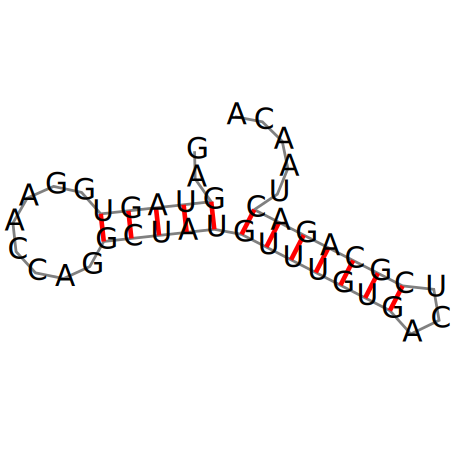

In [20]:
import tempfile
from IPython.display import SVG

fp = tempfile.NamedTemporaryFile(suffix="svg")
RNA.svg_rna_plot(sequence, structure=ss, ssfile=fp.name)
SVG(fp.name)

#### Predicting partition funtions and  base pair probabilities

In [21]:
## Code adapted from the Vienna RNA package API documentation

import RNA
sequence = "GAGUAGUGGAACCAGGCUAUGUUUGUGACUCGCAGACUAACA"
# create model details
md = RNA.md()
# activate unique multibranch loop decomposition
md.uniq_ML = 1
# create fold compound object
fc = RNA.fold_compound(sequence, md)
# compute MFE
(ss, mfe) = fc.mfe()
# rescale Boltzmann factors according to MFE; rescaling avoids numerical problems for long sequences
fc.exp_params_rescale(mfe)
# compute partition function to fill DP matrices
fc.pf()

['..(((((........)))))(((((((...))))))).....', -9.020990371704102]

After calculating the partition function, one can get a matrix of base pair probabilities from the fold compound. Attention: this matrix is 1-based and only entries i<j are meaningful.

In [22]:
bpp = fc.bpp()
print(bpp)

((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.471517529842516e-06, 0.0, 0.0, 0.0, 0.0, 6.791430803472922e-06, 0.0010463644992186186, 0.0, 0.0, 0.0, 7.447410311850145e-05, 2.92913569414249e-05, 0.0, 0.0005026182125581969, 0.0, 3.417231000231424e-05, 1.848688945200157e-05, 5.428577622559219e-06, 0.0, 2.060338991945053e-08, 0.0, 0.0, 3.3297354773749255e-08, 1.2277730722081867e-08, 0.007621723242911448, 0.0, 2.7482845615862142e-05, 0.0, 0.0, 0.0, 3.630494075522003e-05, 8.06813645180743e-05, 0.0, 0.0, 0.0024215220879167947, 0.0), (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4132247404604086e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02522054561995579, 0.0, 0.003759500839455213, 0.0, 2.829946707802918e-05, 7.251982919229705e-06, 1.0551914003292455e-06, 0.0, 6.341868188769273e-08

The base pair probabilities can be visualized

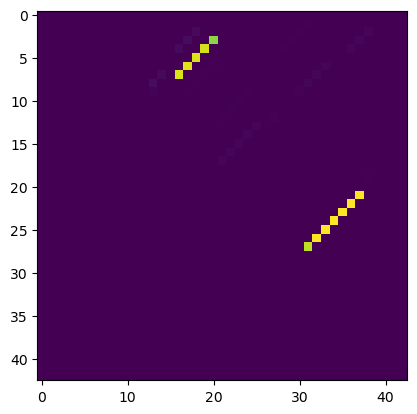

In [23]:
# produce simple 'dot plot'
import matplotlib.pyplot as plt
bpp2 = [p**2 for row in bpp[1:] for p in row[1:]]
plt.imshow(bpp)

We will also need unpaired probabilities for nucleotides i. They can be computed from the base pair probabilities. We obtain an unpaired probability profile of our RNA.

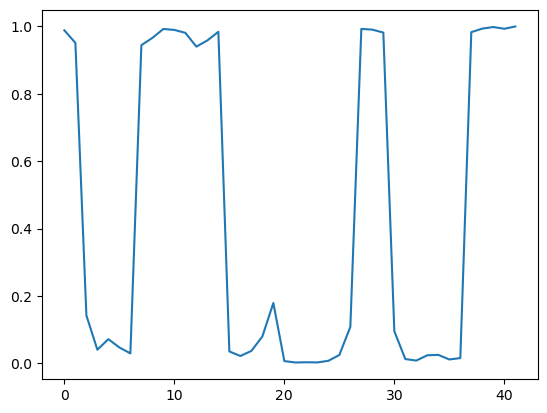

In [24]:
# compute unpaired probabilities (0-based)
# ATTENTION: bpp contains probability values only for i<j
unp = [1-sum(bpp[i][j]+bpp[j][i] for j in range(1,len(sequence)+1)) for i in range(1,len(sequence)+1)]
#print(unp)
plt.plot(unp)

#### Predicting structures from alignments

The Vienna package can predict structures from Alignments by the *Alifold* method. For this purpose, we pass an alignment (instead of a single sequence) to the fold compound. Then, we can ask it to produce an mfe structure (or partion function, ...) as in the single sequence case.

In [25]:
import RNA
# The RNA sequence

alignment = ["GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC",
"GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC",
"GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC",
"GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC",
"GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC"
]

# create a new model details structure
md = RNA.md()
# optionally one could change some parameters
# md.temperature = 25.0 # 25 Deg Celcius
# md.dangles = 1 # keep default 2 for compatibility with partition folding
# create a fold compound
fc = RNA.fold_compound(alignment, md)
# predict the  "Alifold" Minmum Free Energy and the corresponding secondary structure
(ss, mfe) = fc.mfe()
conservation_score = fc.eval_covar_structure(ss)
print("%s\n%s [ %6.2f, %6.2f ]\n" % ('\n'.join(alignment), ss, mfe, conservation_score))

GGAGGAUUAGCUCAGCUGGGAGAGCAUCUGCCUUACAAGCAGAGGG-----------UCGGCGGUUCGAGCCCGUCAUCCUCC
GCCUUCCUAGCUCAG-UGGUAGAGCGCACGGCUUUUAACCGUGUGG-----------UCGUGGGUUCGAUCCCCACGGAAGGC
GCCUUUAUAGCUUAG-UGGUAAAGCGAUAAACUGAAGAUUUAUUUA-----------CAUGUAGUUCGAUUCUCAUUAAGGGC
GCGGAUAUAACUUAGGGGUUAAAGUUGCAGAUUGUGGCUCUGAAAA------------CACGGGUUCGAAUCCCGUUAUUCGC
GGAAAAUU-GAUCAUCGGCAAGAUAAGUUAUUUACUAAAUAAUAGGAUUUAAUAACCUGGUGAGUUCGAAUCUCACAUUUUCC
(((((((..((((........))))((((((.......))))))...............(((((.......)))))))))))) [ -25.34,   7.80 ]



## Assignment 5: Use the Vienna RNA package

a) Write a function that takes an alignment (as above) and computes the mfe structures of the single sequences (without gaps).

b) Compare the single sequence mfe structures to the alifold mfe structure of the alignment (compare dot bracket strings and/or visualize as secondary structure plots).

c) Write a function that takes an alignment (as above) and computes the average positional unpaired probabilities from folding
the single sequences. Take care, where this requires to map sequence positions to alignment columns or vice versa.

d) Visually compare this profile to the Alifold mfe structure and the corresponding Alifold unpaired probability profile. 

e) Quantify the difference between the profiles (e.g. sum over the log of the positional ratios...).

In [26]:
import RNA

def mfe_structure(sequence):
    md = RNA.md()
    fc = RNA.fold_compound(sequence, md)
    (ss, mfe) = fc.mfe()
    return ss, mfe

In [27]:
def get_all_individual_mfes(alignment):
    individual_results = []
    for seq_ali in alignment:
        seq_pure = seq_ali.replace('-', '')
        ss, mfe = mfe_structure(seq_pure)
        individual_results.append((seq_pure, ss, mfe))
    return individual_results

def compare_structures(alignment):
    # 1. Calcul Alifold
    fc_ali = RNA.fold_compound(alignment)
    ali_ss, ali_mfe = fc_ali.alifold()
    
    for i, seq_ali in enumerate(alignment):
        # MFE de la séquence seule
        seq_pure, ss_single, _ = get_all_individual_mfes(alignment)[i]
        # Projection du consensus
        _, ss_proj = project_structure(seq_ali, ali_ss)
        
        print(f"Séquence {i}:")
        print(f"  MFE Single: {ss_single}")
        print(f"  Alifold Pr: {ss_proj}")
        
        # Plot (ViennaRNA génère des fichiers .ps)
        RNA.export_structure_plot(seq_pure, ss_single, f"single_{i}.ps")
        RNA.export_structure_plot(seq_pure, ss_proj, f"alifold_proj_{i}.ps")

In [28]:
def get_unpaired_probs_from_fc(fc, length):
    """Calcule le profil unpaired à partir d'un fold_compound."""
    fc.pf() # Obligatoire pour les probabilités
    bpp = fc.bpp() # Matrice de probabilité de paires
    
    unpaired_probs = np.ones(length)
    for i in range(1, length + 1):
        sum_p = 0
        for j in range(1, length + 1):
            if i != j:
                sum_p += bpp[i][j] if i < j else bpp[j][i]
        unpaired_probs[i-1] -= sum_p
    return unpaired_probs

def get_avg_unpaired_probs_single(alignment):
    """Calcule la moyenne des probabilités unpaired des séquences seules."""
    n_cols = len(alignment[0])
    all_profiles = []

    for seq_ali in alignment:
        seq_pure = seq_ali.replace('-', '')
        fc = RNA.fold_compound(seq_pure)
        p_unpaired = get_unpaired_probs_from_fc(fc, len(seq_pure))

        # Remappage vers les colonnes de l'alignement
        col_profile = np.zeros(n_cols)
        cursor = 0
        for col, char in enumerate(seq_ali):
            if char != '-':
                col_profile[col] = p_unpaired[cursor]
                cursor += 1
        all_profiles.append(col_profile)
    return np.mean(all_profiles, axis=0)

def plot_profiles(alignment):
    """Génère le graphique de comparaison (Point D)."""
    # 1. Profil Single moyen
    avg_single = get_avg_unpaired_probs_single(alignment)
    
    # 2. Profil Alifold
    fc_ali = RNA.fold_compound(alignment)
    ali_unpaired = get_unpaired_probs_from_fc(fc_ali, len(alignment[0]))

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(avg_single, label="Moyenne des séquences seules (Single)", color='blue', lw=1.5)
    plt.plot(ali_unpaired, label="Alifold (Consensus)", color='red', linestyle='--', alpha=0.8)
    
    plt.fill_between(range(len(avg_single)), avg_single, color='blue', alpha=0.1)
    plt.xlabel("Colonnes de l'alignement")
    plt.ylabel("Probabilité d'être non-apparié")
    plt.title("Comparaison des profils d'accessibilité (Unpaired Probabilities)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    # Quantification (Point E)
    eps = 1e-6
    diff = np.sum(np.abs(np.log((avg_single + eps) / (ali_unpaired + eps))))
    print(f"Différence totale (Log-Ratio) : {diff:.4f}")

Structure Alifold:
(((((((..((((........))))((((((.......))))))...............(((((.......))))))))))))



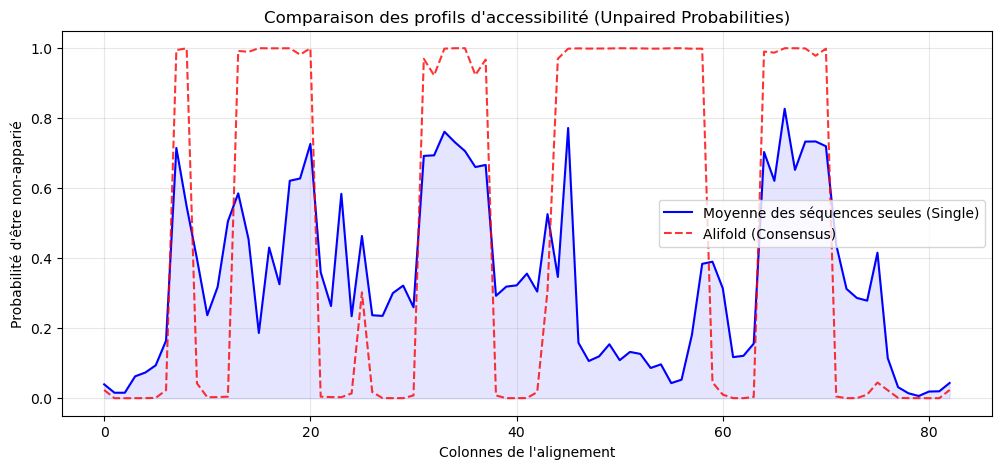

Différence totale (Log-Ratio) : 229.5552


In [29]:
# --- Test du Point A/B (MFE) ---
md = RNA.md()
fc = RNA.fold_compound(alignment, md)
(ali_ss, mfe) = fc.mfe()
print(f"Structure Alifold:\n{ali_ss}\n")

# --- Test du Point D/E (Profils) ---
plot_profiles(alignment)

## Test data

Find test data here
https://www.lix.polytechnique.fr/~will/Teaching/INF588/Testdata

Can your program handle all of the diverse examples (in different file formats)?

Here is one way to download the data to Colab by downloading an archive of all files and unpacking it. The files will be written to subdirectory Testdata

In [30]:
from urllib.request import urlretrieve
arcfile = "testdata.zip"
url = f"https://www.lix.polytechnique.fr/~will/Teaching/INF588/{arcfile}"
urlretrieve(url, arcfile)

import zipfile
with zipfile.ZipFile(arcfile, 'r') as zip_ref:
    zip_ref.extractall(".")

!ls Testdata

PermissionError: [Errno 13] Permission denied: 'Testdata/5S_rRNA.apsi-54.sci-95.no-1.ref.fa'

## Assignment 6

a) Write a function to read an alignment from either an aln or stk file. Use Biopython (https://biopython.org/docs/1.86/api/Bio.AlignIO.html) and find out about stk / Stockholm files!

b) Apply the functions from the previous assignment to the test alignments. How could we interpret the results?

In [ ]:
import Bio.AlignIO

def read_rna_alignment(file_path):
    """
    Détermine le format par l'extension et extrait les séquences.
    """
    # Détection du format selon l'extension
    fmt = "stockholm" if file_path.endswith(".stk") else "clustal"
    
    try:
        alignment = Bio.AlignIO.read(file_path, fmt)
        # On extrait chaque séquence sous forme de string dans une liste
        return [str(record.seq) for record in alignment]
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier : {e}")
        return []

In [ ]:
# Test
sequences = read_rna_alignment("Testdata/tRNA_7.stk")
print(f"Nombre de séquences chargées : {len(sequences)}")


Nombre de séquences chargées : 7


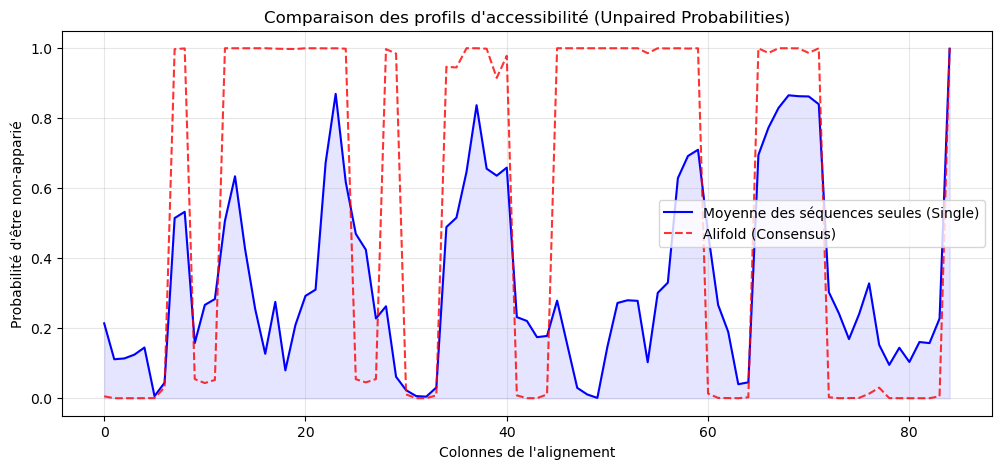

Différence totale (Log-Ratio) : 225.4401


In [ ]:

fc_ali = RNA.fold_compound(sequences)
(ali_ss, ali_mfe) = fc_ali.mfe()

plot_profiles(sequences)

## How to work on the project
In principle, you could start your work using Colab and simply extend this notebook. However at least in the longer run, it will have advantages to run everything 'locally' on your own computer; without Colab.  Note that for example, running larger computations in Colab can be inconvenient; also, Colab will require you to reinstall Conda, Biopython and Vienna RNA in each new Colab session.

See above for how pip can be used to install the required software. This works in Colab as well as locally. *Optionally*: For local installation, one should consider installation in a Conda environment or Python virtual environment (which helps to keep things nicely structured, if one works on several projects with different software dendencies etc). 

# Session 2: Nussinov algorithm 20/01/2026

Implement a generalized alignment folding Nussinov algorithm
Test your implementation

Directly implement an algorithm that can be specialized to the alignment RNAalifold variants.
To allow the generalization, your function(s) can have arguments for the specific functions
UNPAIRED ACC and PAIRED ACC.
For debugging: test with a small alignment of only one sequence and MTA accuracy functions.
Derive a the matrix for a small example by hand; the trace back must return the ’input’ structure.

```
GCCGCUUA-CAGGAAUCCUGC
CGCGCUUAGCAGGAAUCCUCG
GCC-CUUAG-U-GAAUCCAGC
((.((...))(((...)))))
```

## Nussinov matrix

In [54]:
def nussinov_algorithm_matrix(seq,m):
    """Copmpute max number of base pairs in seq[0..n-1] using Nussinov algorithm"""
    # Initialisation de la matrice DP
    n = len(seq)
    dp = np.zeros((n, n), dtype=int)

    traceback = np.zeros((n, n), dtype=object)

    # Remplissage de la matrice
    for i in range(n-1, -1, -1):
        for j in range(i+1, n):
            if j - i <= m:
                continue

            best = 0
            # appariement i-j
            if is_canonical_basepair(seq[i], seq[j]):
                val = dp[i+1][j-1] + 1
                if val > best:
                    best = val
                    traceback[i][j] = 'PAIR'

            # split
            for k in range(i+1, j):
                val = dp[i][k] + dp[k+1][j]
                if val > best:
                    best = val
                    traceback[i][j] = ('SPLIT',k)

            dp[i][j] = best
    
    return dp, traceback

In [38]:
def get_pairs(traceback, i, j):
    if i >= j:
        return []
    
    decision = traceback[i][j]
    
    if decision == 'PAIR':
        # On a une paire (i, j), et on continue à l'intérieur
        return [(i+1, j+1)] + get_pairs(traceback, i + 1, j - 1)
    
    elif isinstance(decision, tuple) and decision[0] == 'SPLIT':
        # On a divisé le problème en deux au point k
        k = decision[1]
        return get_pairs(traceback, i, k) + get_pairs(traceback, k + 1, j)
    
    else:
        return []

In [71]:
#Test
#seq = "GAUCUCACGGUCAA"
seq = "GCACGACG"

nussinov_results, traceback = nussinov_algorithm_matrix(seq,0)
print(nussinov_results)

[[0 1 1 1 2 2 2 3]
 [0 0 0 0 1 1 1 2]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 1 1 1 2]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0]]


In [74]:
base_pairs = get_pairs(traceback, 0, len(seq)-1)
print(base_pairs)

[(1, 2), (4, 8), (5, 7)]


In [75]:
#Affichage de la structure au format dot-bracket
dot_bracket = pairs_to_dot_bracket(len(seq), sorted(base_pairs))
print(dot_bracket)

().((.))


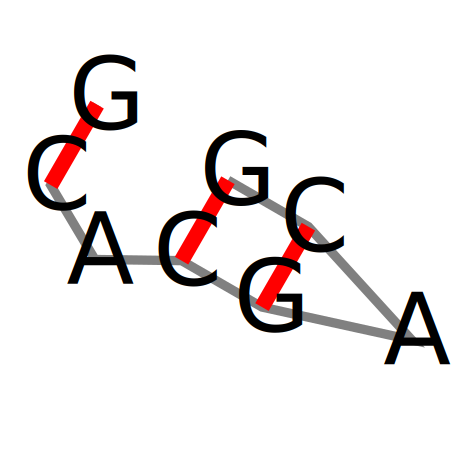

In [76]:
fp = tempfile.NamedTemporaryFile(suffix="svg1")
RNA.svg_rna_plot(seq, structure=dot_bracket, ssfile=fp.name)
SVG(fp.name)

## MTA Algorithm

In [ ]:
# Accuracy evaluation
def calculate_unpaired_acc(predicted_pairs, true_pair, index):
    """Renvoie l'accuracy à partir des séquences dot-bracket à l'indice i"""
    n = len(predicted_pairs)
    acc = 0
    for i in range(n):
        if predicted_pairs[i][index] == '.':
            acc += 1
    return acc
def calculate_paired_acc(predicted_pair, true_pair, n):